In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
df=pd.read_csv('/content/cleaned_data.csv')

In [212]:
pd.set_option('display.max_columns',None)
pd.set_option("display.max_rows",None)

<Axes: ylabel='price'>

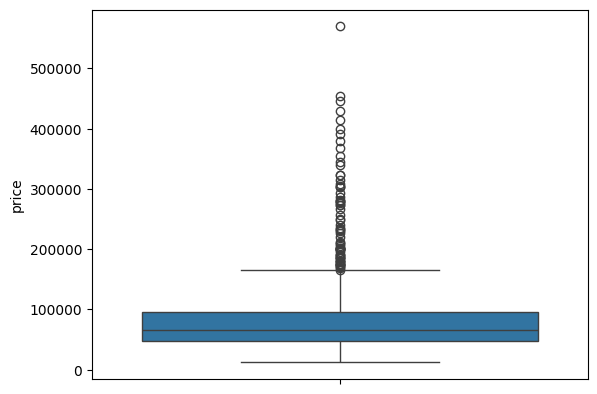

In [213]:
sns.boxplot(df["price"])

<Axes: xlabel='price', ylabel='Density'>

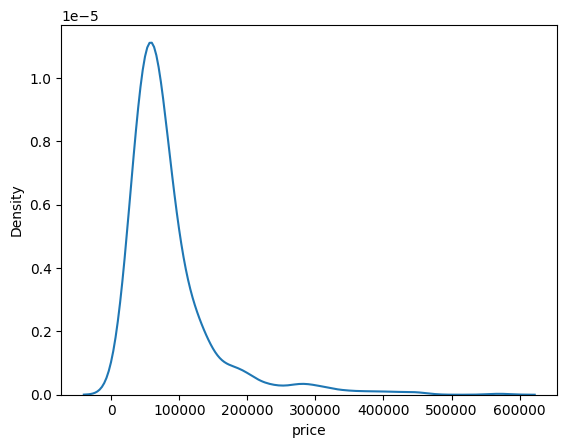

In [182]:
sns.kdeplot(df["price"])

In [183]:
quantiles=df["price"].quantile([0.10,0.25,0.5,0.75,0.95,0.99])
quantiles

,price
0.10,34990.00
0.25,47990.00
0.50,65745.00
0.75,94990.00
0.95,210171.35
0.99,367962.00


In [184]:
q1=quantiles[0.25]
q3=quantiles[0.75]
iqr=q3-q1
outlier_low=q1-1.5*iqr
outlier_high=q3+1.5*iqr

### Observations
- all values are valid in price



<Axes: xlabel='thickness'>

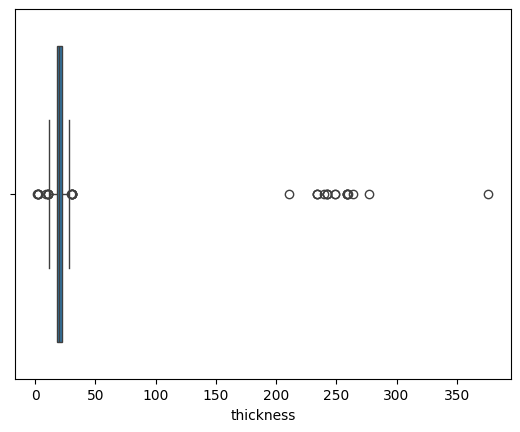

In [185]:
sns.boxplot(x=df["thickness"])

<Axes: xlabel='thickness', ylabel='Density'>

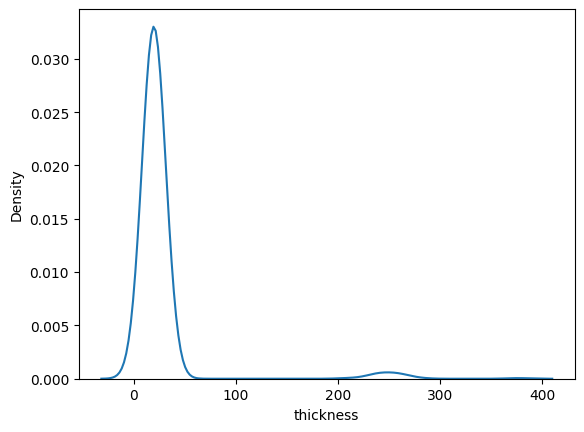

In [186]:
sns.kdeplot(df["thickness"])

In [187]:
df["thickness"].describe()

,thickness
count,613.000000
mean,26.717129
std,40.308621
min,1.950000
25%,17.900000
50%,19.800000
75%,22.500000
max,376.170000


In [214]:
lower_bound=10
upper_bound=32

In [215]:
df["thickness"]=df["thickness"].apply(lambda x:x if x>lower_bound else x*10 )
df["thickness"]=df["thickness"].apply(lambda x:x if x<upper_bound else x/10 )

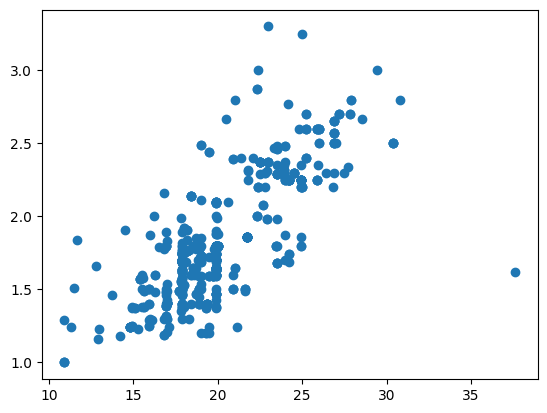

In [191]:
plt.scatter(df["thickness"],df["weight"])

In [192]:
df["weight"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 798 entries, 0 to 797
Series name: weight
Non-Null Count  Dtype  
--------------  -----  
720 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


In [193]:
df[(df["thickness"].isnull() & df["weight"].isnull())].shape

(69, 43)

<Axes: xlabel='num_of_cell', ylabel='weight'>

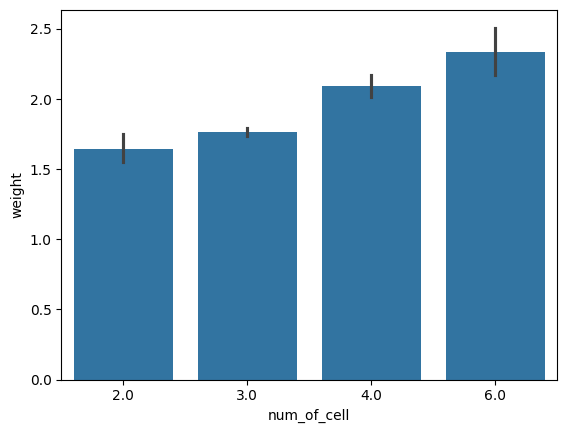

In [194]:
sns.barplot(x=df["num_of_cell"],y=df["weight"])

In [195]:
df["num_of_cell"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 798 entries, 0 to 797
Series name: num_of_cell
Non-Null Count  Dtype  
--------------  -----  
639 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


<Axes: xlabel='battery_capacity', ylabel='weight'>

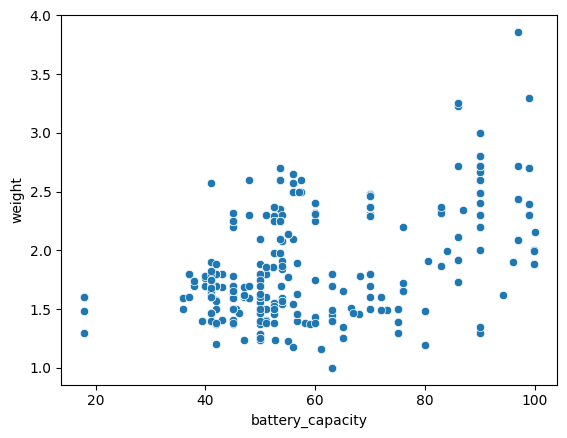

In [196]:
sns.scatterplot(x=df["battery_capacity"],y=df["weight"])

<Axes: xlabel='num_of_cell', ylabel='battery_capacity'>

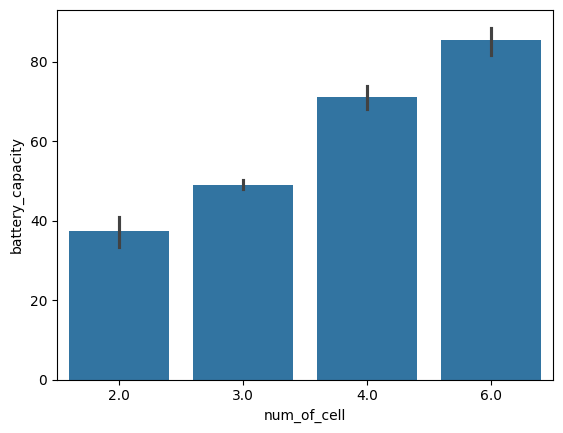

In [197]:
sns.barplot(x=df["num_of_cell"],y=df["battery_capacity"])

In [198]:
df["battery_capacity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 798 entries, 0 to 797
Series name: battery_capacity
Non-Null Count  Dtype  
--------------  -----  
596 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


In [199]:
df["display_size"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 798 entries, 0 to 797
Series name: display_size
Non-Null Count  Dtype  
--------------  -----  
798 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


<Axes: xlabel='weight', ylabel='display_size'>

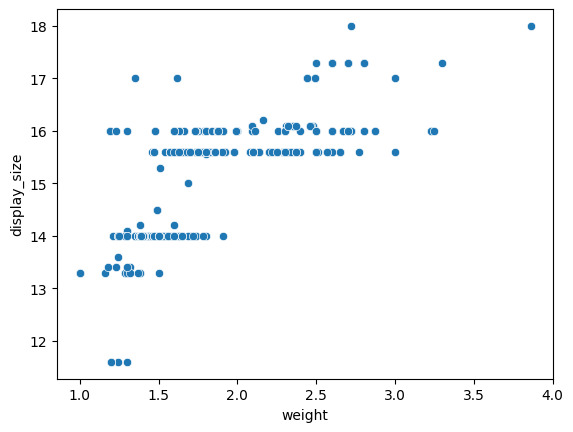

In [200]:
sns.scatterplot(x=df["weight"],y=df["display_size"])

In [201]:
df["display_size"].quantile([0.25,0.50,0.83])

,display_size
0.25,14.0
0.50,15.6
0.83,16.0


In [216]:
def convert_display_size(x):
  if x>11 and x<=14:
    return "small"
  elif x>14 and x<16:
    return "medium"
  else:
    return "large"

In [217]:
df["display_size"]=df["display_size"].apply(convert_display_size)

In [218]:
df["display_size"].value_counts()

,count
display_size,
medium,428
small,229
large,141


<Axes: xlabel='display_size', ylabel='weight'>

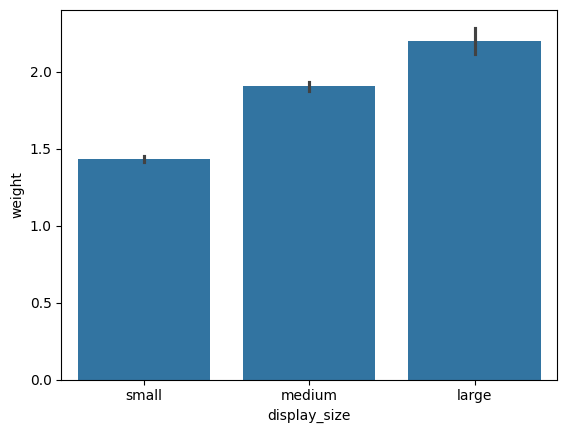

In [205]:
sns.barplot(x=df["display_size"],y=df["weight"])

In [221]:
mean_weight=df.groupby("display_size")["weight"].mean()

In [222]:
mean_weight

,weight
display_size,
large,2.197209
medium,1.904233
small,1.434332


In [223]:
for i in df[df["weight"].isnull()].index:
  if df.loc[i,"display_size"]=="large":
    df.loc[i,"weight"]=mean_weight[0]
  elif df.loc[i,"display_size"]=="medium":
    df.loc[i,"weight"]=mean_weight[1]
  else:
    df.loc[i,"weight"]=mean_weight[2]

<ipython-input-223-11e4d4623d1d>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[i,"weight"]=mean_weight[0]
<ipython-input-223-11e4d4623d1d>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[i,"weight"]=mean_weight[1]
<ipython-input-223-11e4d4623d1d>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[i,"weight"]=mean_weight[2]


In [224]:
df["weight"].isnull().sum()

0

(array([  0.,   0., 183., 401., 153.,  56.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <BarContainer object of 6 artists>)

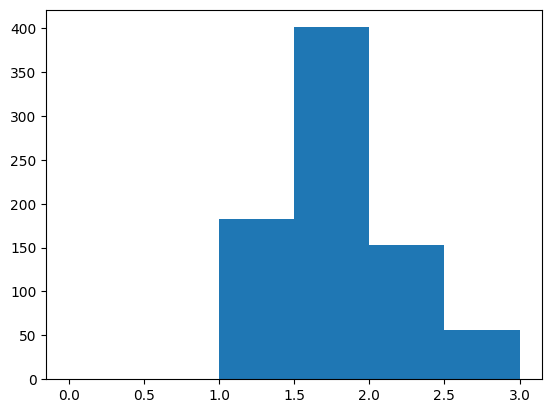

In [124]:
plt.hist(df["weight"],bins=[0,0.5,1.0,1.5,2.0,2.5,3.0])

<Axes: xlabel='weight', ylabel='Count'>

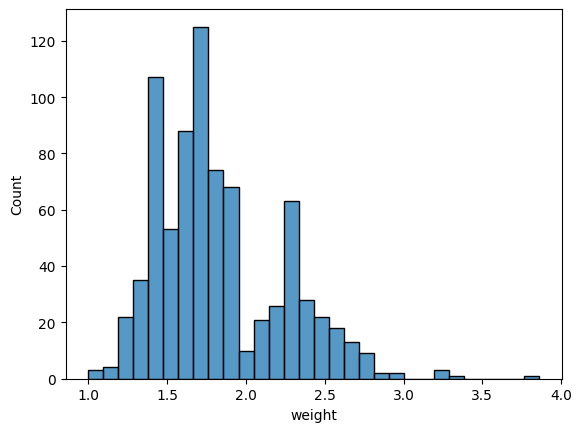

In [127]:
sns.histplot(df["weight"],bins=30)

In [225]:
def convert_weight(x):
  if x<=1.5:
    return "lite"
  elif x>1.5 and x<2.0:
    return "medium"
  else:
    return "heavy"

In [226]:
df["weight"]=df["weight"].apply(convert_weight)

In [227]:
df["weight"].value_counts()

,count
weight,
medium,376
heavy,214
lite,208


<Axes: xlabel='weight', ylabel='thickness'>

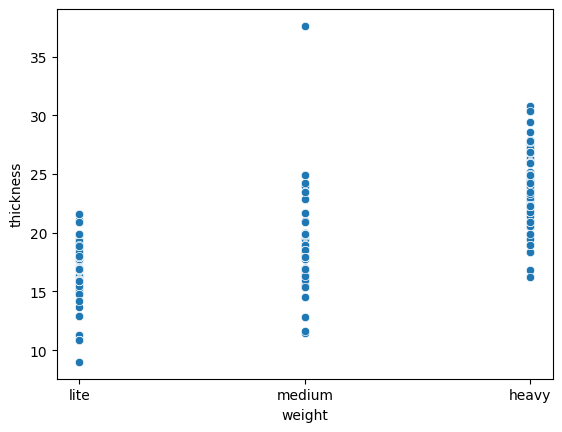

In [144]:
sns.scatterplot(x=df["weight"],y=df["thickness"])

In [ ]:
mean_thickness=df.groupby("weight")["thickness"].mean()
mean_thickness

In [229]:
for i in df[df["thickness"].isnull()].index:
  if df.loc[i,"weight"]=="heavy":
    df.loc[i,"thickness"]=mean_thickness[0]
  elif df.loc[i,"weight"]=="lite":
    df.loc[i,"thickness"]=mean_thickness[1]
  else:
    df.loc[i,"thickness"]=mean_thickness[2]

<ipython-input-229-e5435a553bd6>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[i,"thickness"]=mean_thickness[2]
<ipython-input-229-e5435a553bd6>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[i,"thickness"]=mean_thickness[0]
<ipython-input-229-e5435a553bd6>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[i,"thickness"]=mean_thickness[1]


In [230]:
df["thickness"].isnull().sum()

0

<Axes: xlabel='thickness', ylabel='Count'>

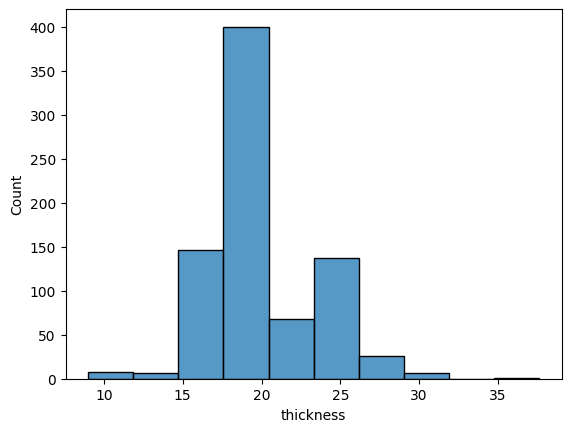

In [150]:
sns.histplot(df["thickness"],bins=10)

In [231]:
def thickness_convert(x):
  if x<=16:
    return "slim"
  elif x>16 and x<23:
    return "medium"
  else:
    return "thick"

In [232]:
df["thickness"]=df["thickness"].apply(thickness_convert)

In [233]:
df["thickness"].value_counts()

,count
thickness,
medium,569
thick,176
slim,53


<Axes: xlabel='utility', ylabel='graphic'>

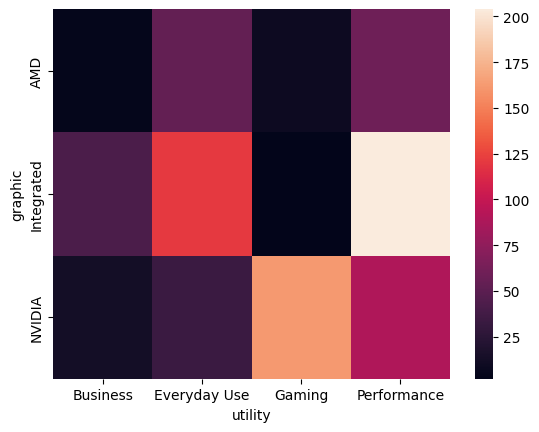

In [159]:
sns.heatmap(pd.crosstab(df["graphic"],df["utility"]))

<Axes: xlabel='utility', ylabel='weight'>

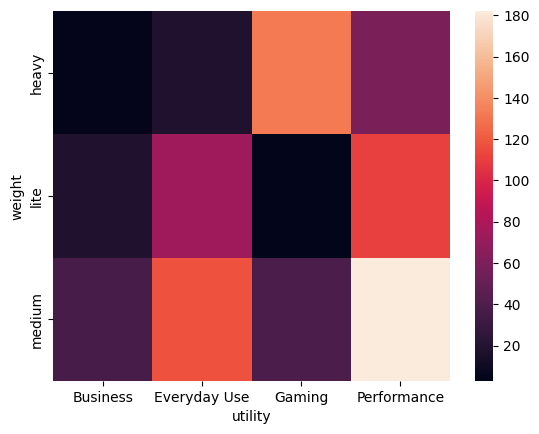

In [160]:
sns.heatmap(pd.crosstab(df["weight"],df["utility"]))

In [235]:
for i in df[df["utility"].isnull()].index:
  if df.loc[i,"weight"]=="heavy":
    df.loc[i,"utility"]="Gaming"
  else:
    df.loc[i,"utility"]="Performance"


In [236]:
df["utility"].isnull().sum()

0

<Axes: xlabel='warranty', ylabel='price'>

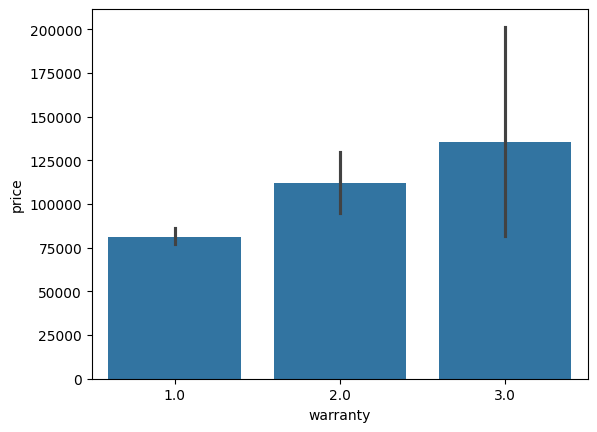

In [166]:
sns.barplot(x=df["warranty"],y=df["price"])

In [237]:
for i in df[df["warranty"].isnull()].index:
  if df.loc[i,"price"]<=90000:
    df.loc[i,"warranty"]=1
  elif df.loc[i,"price"]<=135000:
    df.loc[i,"warranty"]=2
  else:
    df.loc[i,"warranty"]=3

In [238]:
df["warranty"].isnull().sum()

0

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                798 non-null    object 
 1   price               798 non-null    float64
 2   brand               798 non-null    object 
 3   no_of_votes         798 non-null    int64  
 4   rating              798 non-null    float64
 5   os                  798 non-null    object 
 6   utility             798 non-null    object 
 7   thickness           798 non-null    object 
 8   weight              798 non-null    object 
 9   warranty            798 non-null    float64
 10  display_size        798 non-null    object 
 11  ppi                 798 non-null    int64  
 12  aspect_ratio        798 non-null    object 
 13  antiglare           798 non-null    int64  
 14  touch_screen        798 non-null    int64  
 15  ram                 798 non-null    int64  
 16  hdd     

<Axes: xlabel='num_of_cell', ylabel='price'>

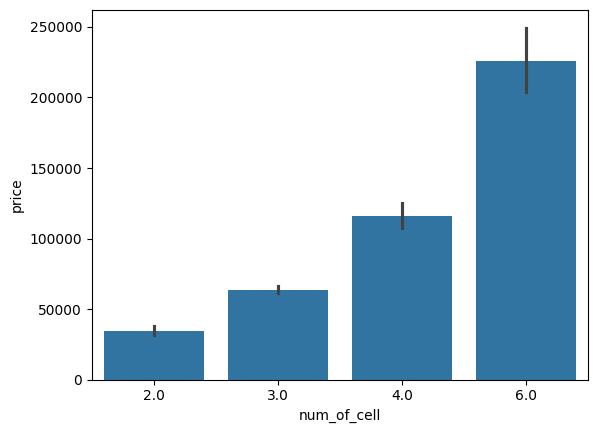

In [250]:
sns.barplot(x=df["num_of_cell"],y=df["price"])

In [246]:
for i in df[df["num_of_cell"].isnull()].index:
  if df.loc[i,"price"]<=50000:
    df.loc[i,"num_of_cell"]=2
  elif df.loc[i,"price"]<=80000:
    df.loc[i,"num_of_cell"]=3
  elif df.loc[i,"price"]<=150000:
    df.loc[i,"num_of_cell"]=4
  else:
    df.loc[i,"num_of_cell"]=6

In [251]:
df["num_of_cell"].isnull().sum()

0

<Axes: xlabel='num_of_cell', ylabel='battery_capacity'>

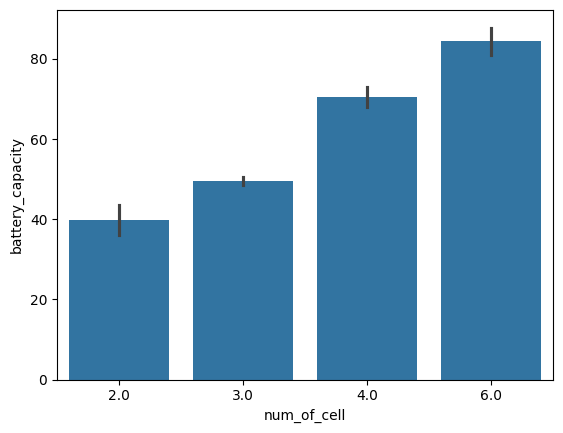

In [252]:
sns.barplot(x=df["num_of_cell"],y=df["battery_capacity"])

<Axes: xlabel='battery_capacity', ylabel='Count'>

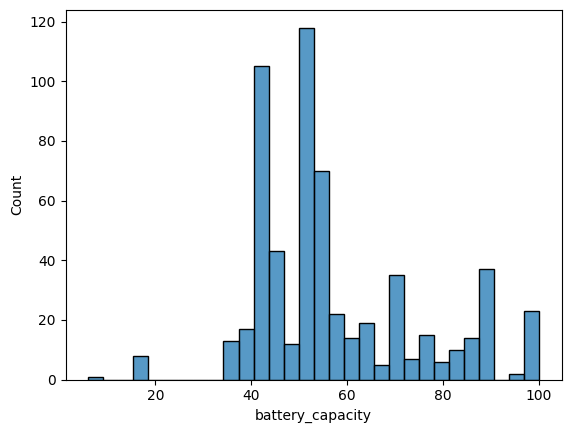

In [254]:
#first we convert the battery capacity column into categorical column
sns.histplot(df["battery_capacity"],bins=30)

In [286]:
mean_battery=df.groupby("num_of_cell")["battery_capacity"].mean()
mean_battery


,battery_capacity
num_of_cell,
2.0,39.840625
3.0,49.616667
4.0,70.582119
6.0,84.426531


In [ ]:
for i in df[df["battery_capacity"].isnull()].index:
    if df.loc[i, "num_of_cell"] == 2.0:
        df.loc[i, "battery_capacity"] = mean_battery[2.0]
    elif df.loc[i, "num_of_cell"] == 3.0:
        df.loc[i, "battery_capacity"] = mean_battery[3.0]
    elif df.loc[i, "num_of_cell"] == 4.0:
        df.loc[i, "battery_capacity"] = mean_battery[4.0]
    else:
        df.loc[i, "battery_capacity"] = mean_battery[6.0]


In [288]:
df["battery_capacity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 798 entries, 0 to 797
Series name: battery_capacity
Non-Null Count  Dtype  
--------------  -----  
798 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


<Axes: xlabel='core', ylabel='ram'>

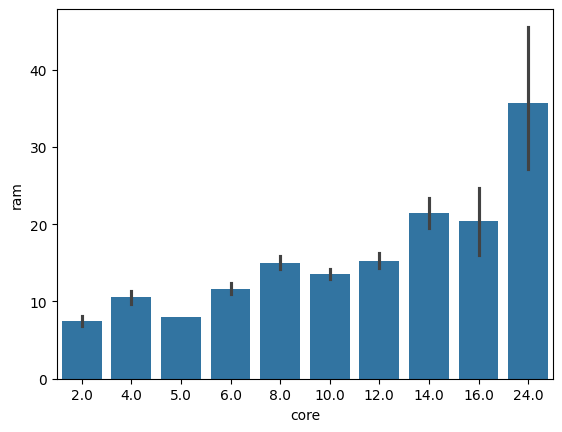

In [291]:
sns.barplot(x=df["core"],y=df["ram"])

In [293]:
df["core"].isnull().sum()

4

In [296]:
df["core"].fillna(df["core"].mode()[0],inplace=True)

<Axes: xlabel='cache', ylabel='thread'>

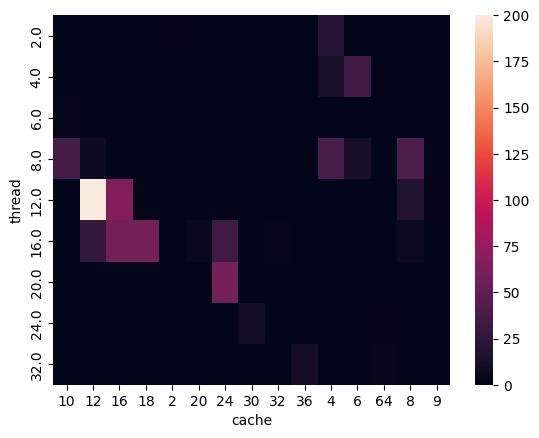

In [315]:
sns.heatmap(pd.crosstab(df["thread"],df["cache"]))

<Axes: xlabel='thread', ylabel='core'>

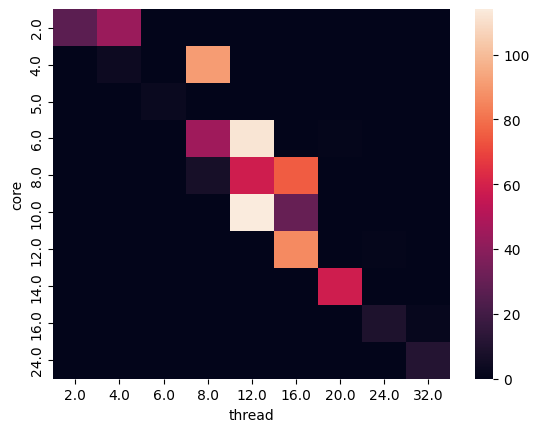

In [298]:
sns.heatmap(pd.crosstab(df["core"],df["thread"]))

In [316]:
df[df["thread"].isnull()]["core"].value_counts()

,count
core,
8.0,9
14.0,5
6.0,2
24.0,2
12.0,1
10.0,1


In [317]:
for i in df[df["thread"].isnull()].index:
  if df.loc[i,"core"]==8:
    df.loc[i,"thread"]=16
  elif df.loc[i,"core"]==14:
    df.loc[i,"thread"]=20
  elif df.loc[i,"core"]==6:
    df.loc[i,"thread"]=12
  elif df.loc[i,"core"]==24:
    df.loc[i,"thread"]=32
  elif df.loc[i,"core"]==12:
    df.loc[i,"thread"]=16
  elif df.loc[i,"core"]==10:
    df.loc[i,"thread"]=12
  else:
    df.loc[i,"thread"]=df.loc[i,"core"]

In [319]:
df["thread"].isnull().sum()

0

<Axes: xlabel='cache', ylabel='core'>

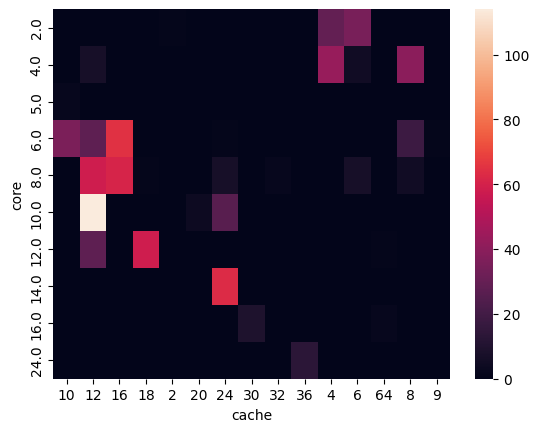

In [322]:
sns.heatmap(pd.crosstab(df["core"],df["cache"]))

<Axes: xlabel='cache', ylabel='ram'>

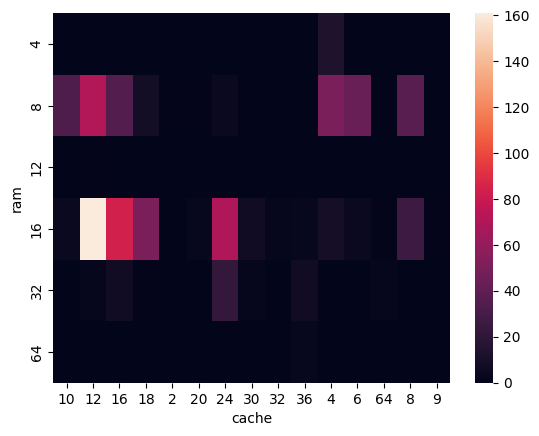

In [323]:
sns.heatmap(pd.crosstab(df["ram"],df["cache"]))

<Axes: xlabel='cache', ylabel='num_of_cell'>

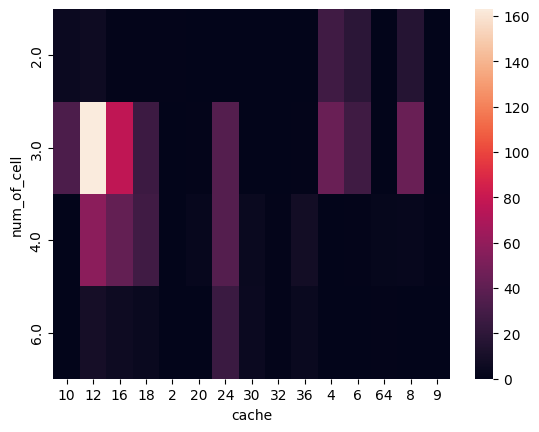

In [325]:
sns.heatmap(pd.crosstab(df["num_of_cell"],df["cache"]))

<Axes: xlabel='graphic', ylabel='cache'>

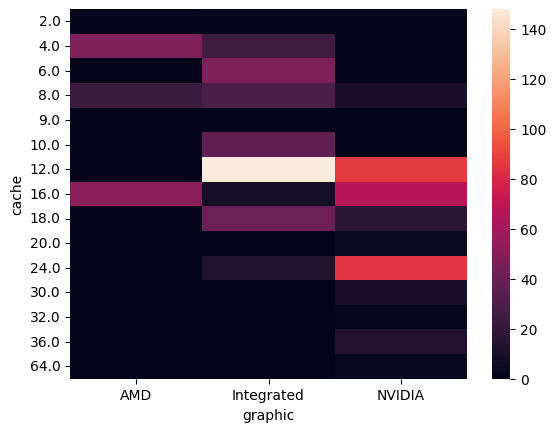

In [335]:
sns.heatmap(pd.crosstab(df["cache"],df["graphic"]))

<Axes: xlabel='cache', ylabel='price'>

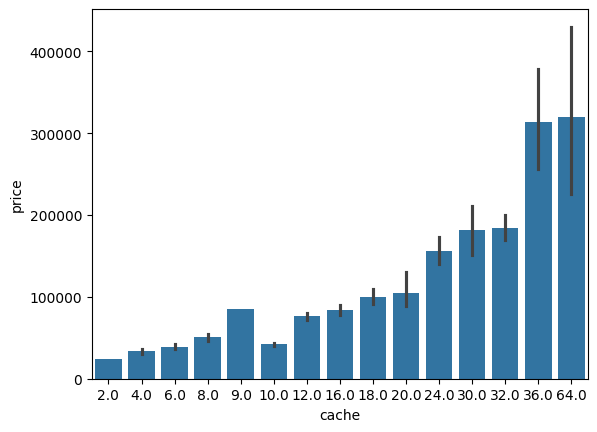

In [334]:
sns.barplot(x=df["cache"],y=df["price"])

<Axes: xlabel='cache', ylabel='battery_capacity'>

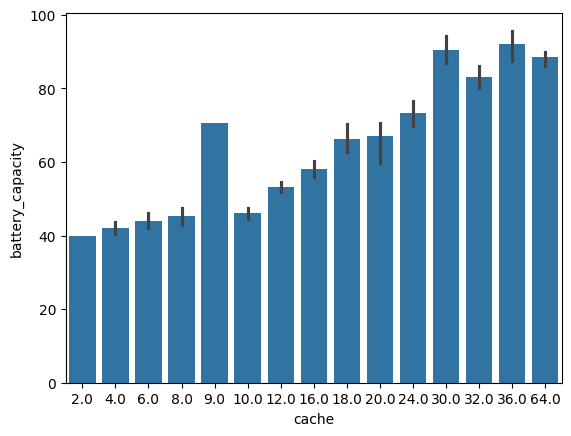

In [333]:
sns.barplot(x=df["cache"],y=df["battery_capacity"])

In [337]:
df["cache"].fillna(df["cache"].mode()[0],inplace=True)

In [340]:
df["pixel_height"].fillna(df["pixel_height"].mode()[0],inplace=True)

In [341]:
df["pixel_width"].fillna(df["pixel_width"].mode()[0],inplace=True)

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                798 non-null    object 
 1   price               798 non-null    float64
 2   brand               798 non-null    object 
 3   no_of_votes         798 non-null    int64  
 4   rating              798 non-null    float64
 5   os                  798 non-null    object 
 6   utility             798 non-null    object 
 7   thickness           798 non-null    object 
 8   weight              798 non-null    object 
 9   warranty            798 non-null    float64
 10  display_size        798 non-null    object 
 11  ppi                 798 non-null    int64  
 12  aspect_ratio        798 non-null    object 
 13  antiglare           798 non-null    int64  
 14  touch_screen        798 non-null    int64  
 15  ram                 798 non-null    int64  
 16  hdd     

In [366]:
df.to_csv("after_missing_value_imputation.csv",index=False)